# Case Study: Analysing Fuel Economy ⛽️

## Introduction
 One of the definition of economy is the consumption of goods and services. When you put economy together with fuel, you get the consumption of fuel by cars.
 One of the definition of economy is the consumption of goods and services. When you put economy together with fuel, you get the consumption of fuel by cars.

In addition, fuel economy refers to the number of miles a car can travel using a specific amount of fuel.

* The fuel economy of an automobile is the fuel efficiency relationship between the distance traveled and the amount of fuel consumed by the vehicle. Consumption can be expressed in terms of volume of fuel to travel a distance, or the distance travelled per unit volume of fuel consumed.

In this case study, we are analyzing fuel economy data provided by the EDA, or the United States Environmental Protection Agency.
(link - https://www.epa.gov/compliance-and-fuel-economy-data/data-cars-used-testing-fuel-economy)

Fuel economy is measured under controlled conditions in a laboratory using a series of tests specified by federal law. Manufacturers test their own vehicles—usually pre-production prototypes—and report the results to EPA. EPA reviews the results and confirms about 15%–20% of them through their own tests at the National Vehicles and Fuel Emissions Laboratory.


Here is the summarised information of the dataset:

* Model – Vehicle make and model
* Displ – Engine displacement - the size of an engine in liters
* Cyl – The number of cylinders in a particular engine
* Trans – Transmission type and number of gears
* Drive – Drive axle type (2WD = 2-wheel drive, 4WD = 4-wheel/all-wheel drive)
* Fuel – Fuel type i.e. gasoline, diesel, ethanol, etc
* Cert Region - Certification Region Code i.e. CA - California
* Veh Class – EPA vehicle class. See here
* Air Pollution Score - Also known as Smog Rating) – see here and here
* City MPG – Estimated city mpg (miles/gallon)
* Hwy MPG – Estimated highway mpg (miles/gallon)
* Cmb MPG – Estimated combined mpg (miles/gallon)
* Greenhouse Gas Score (Greenhouse Gas Rating) – see here
* SmartWay – Yes, No, or Elite. See here


# Through this analysis
Based on an initial study of the dataset, we have come up with several questions that we would like the answer to and, which our analysis would be based on.

The questions are>>>

* Are more models using alternative sources of fuel? By how much?
* How much have vehicle classes improved in fuel economy?
* What are the characteristics of SmartWay vehicles?
* What features are associated with better fuel economy?
* For all the models that were produced in 2008 that are still produced in 2018, how much has the mpg (miles/gallon) improved and which vehicle improved the most?

In [1]:
# Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading CSV

df1 = pd.read_csv('fuel economy.csv')     #df1 means data of 2008
df2 = pd.read_csv('fuel economy_a.csv')   #df2 means data of 2018

In [3]:
#Preview
df1.head(5)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [4]:
#Preview
df2.head(5)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


We will run a few queries to get these information from our data set.

* How many samples (rows/observations) and columns does our data sets have?
* Are there any duplicated rows and if yes, how many?
* What are the data types?
* Is there any missing values and if yes, how many?
* What are the unique values and what is the count?

In [5]:
#Rows and columns
df1.shape, df2.shape

((2404, 18), (1611, 18))

In [6]:
#Duplicates rows

df1.duplicated().sum(), df2.duplicated().sum()

(25, 0)

Here 25 duplicates in df1

In [7]:
#Duplicate columns

df1.info(), df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

(None, None)

In [8]:
#checking missing value

df1.isnull().sum(), df2.isnull().sum()

(Model                     0
 Displ                     0
 Cyl                     199
 Trans                   199
 Drive                    93
 Fuel                      0
 Sales Area                0
 Stnd                      0
 Underhood ID              0
 Veh Class                 0
 Air Pollution Score       0
 FE Calc Appr            199
 City MPG                199
 Hwy MPG                 199
 Cmb MPG                 199
 Unadj Cmb MPG           199
 Greenhouse Gas Score    199
 SmartWay                  0
 dtype: int64,
 Model                   0
 Displ                   2
 Cyl                     2
 Trans                   0
 Drive                   0
 Fuel                    0
 Cert Region             0
 Stnd                    0
 Stnd Description        0
 Underhood ID            0
 Veh Class               0
 Air Pollution Score     0
 City MPG                0
 Hwy MPG                 0
 Cmb MPG                 0
 Greenhouse Gas Score    0
 SmartWay                0
 Com

There is some null values in 2008 like  Cyl, Trans  

In [9]:
#number of nun - null unique values for each dataset

df1.nunique(), df2.nunique()

(Model                   436
 Displ                    47
 Cyl                       8
 Trans                    14
 Drive                     2
 Fuel                      5
 Sales Area                3
 Stnd                     12
 Underhood ID            343
 Veh Class                 9
 Air Pollution Score      13
 FE Calc Appr              2
 City MPG                 39
 Hwy MPG                  43
 Cmb MPG                  38
 Unadj Cmb MPG           721
 Greenhouse Gas Score     20
 SmartWay                  2
 dtype: int64,
 Model                   367
 Displ                    36
 Cyl                       7
 Trans                    26
 Drive                     2
 Fuel                      5
 Cert Region               2
 Stnd                     19
 Stnd Description         19
 Underhood ID            230
 Veh Class                 9
 Air Pollution Score       6
 City MPG                 58
 Hwy MPG                  62
 Cmb MPG                  57
 Greenhouse Gas Score     10

In [10]:
df1['Fuel'].unique(), df2['Fuel'].unique()

(array(['Gasoline', 'ethanol/gas', 'ethanol', 'diesel', 'CNG'],
       dtype=object),
 array(['Gasoline', 'Gasoline/Electricity', 'Diesel', 'Ethanol/Gas',
        'Electricity'], dtype=object))

## Cleaning Column Labels

Firstly, before we begin with transforming the data, we will drop the columns that are not consistent (not present in both data sets) or are not relevant to our questions.
* We use the pandas df.drop() function.

### Drop irrelevent Columns

In [11]:
#drop columns from 2008

df1.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis=1, inplace=True)

#verifying
df1.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [12]:
#drop columns from 2018

df2.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis=1, inplace=True)

#verifying
df1.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


### Rename Columns
We change the *Sales Area* column in the 2008 dataset to *Cert Region* for consistency.


 in addition rename all column names to replace spaces with *underscores _* and convert everything to *lowercase*.

Underscores can be much easier to work with in Python than spaces. For example, having spaces wouldn't allow you to use df.column_name instead of df['column_name'] to select columns or use query(). Being consistent with lowercase and underscores also helps make column names easy to remember.

In [13]:
# rename Sales Area to Cert Region

df1.rename(columns = {'Sales Area': 'Cert Region'}, inplace = True)

#confirm

df1.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [14]:
#replace spaces with underscores and lowercase labels for 2008 dataset

df1.rename(columns = lambda x:  x.strip().lower().replace(" ", "_"), inplace = True)

#varifing>
df1.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [15]:
##replace spaces with underscores and lowercase labels for 2018 dataset

df2.rename(columns = lambda x: x.strip().lower().replace(" ", "_"), inplace = True)

#verifing
df2.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


In [16]:
#lets check both datasets are identical or not

df1.columns == df2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

True > 
* We confirmed that the column names in both 2008 and 2018 datasets are the same.

## Filter, Drop Nulls, Deduplication

#### 1. Filter

For consistency, we would only compare cars certified by California standards. Filter both datasets using df.query() to select only rows where cert_region is CA. Then, drop the cert_region columns, since it will no longer provide any useful information (we'll know every value is 'CA').

#### 2.Drop Nulls

Drop any rows in both datasets that contain missing values.

#### 3.Deduplication
Drop any duplicate rows in both datasets.

### 1. Filter by Certification Region>

Use df.query() to filter CA values in cert_region column. Then, running df.unique() to confirm that the updated datasets have CA values only.

In [17]:
# filter datasets for rows following California standards

df1 = df1.query('cert_region == "CA"')
df2 = df2.query('cert_region == "CA"')

In [18]:
# confirm only certification region is California

df1['cert_region'].unique(), df2['cert_region'].unique()

(array(['CA'], dtype=object), array(['CA'], dtype=object))

In [19]:
df1.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,midsize car,7,16,24,19,5,no
6,ACURA TL,3.2,(6 cyl),Auto-S5,2WD,Gasoline,CA,midsize car,7,18,26,21,6,yes
7,ACURA TL,3.5,(6 cyl),Auto-S5,2WD,Gasoline,CA,midsize car,7,17,26,20,6,yes


Use df.drop() and setting axis=1 to refer to columns and inplace=True to reflect the removal of selected values from the existing datasets.

In [20]:
# drop certification region columns form both datasets

df1.drop('cert_region', axis=1, inplace=True)
df2.drop('cert_region', axis=1, inplace=True)

In [21]:
df1.shape, df2.shape

((1084, 13), (798, 13))

### 2. Drop Rows with Missing Values

Use *df.isnull().sum()* to find whether there are any missing values and the count of the missing values.

In [22]:
df1.isnull().sum()

model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64

In [23]:
df2.isnull().sum()

model                   0
displ                   1
cyl                     1
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

Now , using run  *df.dropna()* with *inplace=True* to reflect changes in dataset.

In [24]:
# drop rows with any null values in both datasets


df1.dropna(inplace = True)
df2.dropna(inplace = True)

In [25]:
#now checking is there any null values in 2008 dataset

df1.isnull().sum().any()

False

In [26]:
#now checking is there any null values in 2018 dataset

df2.isnull().sum().any()

False

So, *False* means there is no null values in both data set

### 3.Deduplication (Dedupe) Data

Use *df.duplicated().sum()* to find whether there are any duplicated rows and the count of it.

In [27]:
# print number of duplicates in 2008 and 2018 datasets

df1.duplicated().sum(),   df2.duplicated().sum()

(23, 3)

Now we have to use df.drop_duplicates() with inplace = True to do changes in real dataset

In [28]:
#droping duplicates from both dataset


df1.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)

In [29]:
#verifing>>

df1.duplicated().sum(), df2.duplicated().sum()

(0, 0)

 There is no duplicates in both dataset

In [30]:
df1.shape,  df2.shape

((986, 13), (794, 13))

# Inspecting Data Types

In [31]:
#inspecting data types>>

df1.info(),  df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 0 to 2400
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 986 non-null    object 
 1   displ                 986 non-null    float64
 2   cyl                   986 non-null    object 
 3   trans                 986 non-null    object 
 4   drive                 986 non-null    object 
 5   fuel                  986 non-null    object 
 6   veh_class             986 non-null    object 
 7   air_pollution_score   986 non-null    object 
 8   city_mpg              986 non-null    object 
 9   hwy_mpg               986 non-null    object 
 10  cmb_mpg               986 non-null    object 
 11  greenhouse_gas_score  986 non-null    object 
 12  smartway              986 non-null    object 
dtypes: float64(1), object(12)
memory usage: 107.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 794 entries, 1 to 1609
D

(None, None)

We analyze that there were some inconsistencies in the data type, hence we will performing these task>>


#####  1. Fix cyl datatype
	 * 2008: extract int from string.
     * 2018: convert float to int.

#####  2.  Fix air_pollution_score datatype
	 * 2008: convert string to float.
     * 2018: convert int to float.   
#####  3.  Fix city_mpg, hwy_mpg, cmb_mpg datatypes
	 * 2008: convert string to float.
     * 2018: convert int to float.
#####  4.  Fix greenhouse_gas_score datatype
	 * 2008: convert from float to int.

lets start from first conversion>>

####  1. Fix cyl datatype
	 * 2008: extract int from string.
     * 2018: convert float to int.

By using *df['col_name'].value_counts()*, we can find the number of values of each unique values in the selected column.

In [32]:
#value count in 2008
df1['cyl'].value_counts()

(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

( this link might help you for understandin next step)
https://stackoverflow.com/questions/35376387/extract-int-from-string-in-pandas

https://docs.python.org/3/howto/regex.html

In [33]:
# Extract int from strings in the 2008 cyl column


#   Set (\d+) to extract numerical digits
#   \d represents the numbers 0-9; 
#   "+" to indicate there's more than 1 number


df1['cyl'] = df1['cyl'].str.extract('(\d+)').astype(int)

In [34]:
#confirm the change in 2008 dataset

df1['cyl'].value_counts()

6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: cyl, dtype: int64

We confirmed that only the integers (numbers 0-9) have been extracted from the strings.

Next, repeat the steps for 2018, but this time we are only converting the data from float to int which requires a simpler function, .astype().

In [35]:
# convert 2018 cyl column form float to int

df2['cyl'] = df2['cyl'].astype(int)

In [36]:
df2['cyl'].value_counts()

4     365
6     246
8     153
3      18
12      9
5       2
16      1
Name: cyl, dtype: int64

# 2. Fix air_pollution_score datatype

 * 2008: convert string to float.
 * 2018: convert int to float.

In [37]:
# check value counts for the 2008 air_pollution_score column


df1['air_pollution_score'].value_counts()

6      500
7      398
9.5     80
9        7
6/4      1
Name: air_pollution_score, dtype: int64

From the output, there are different type of unique values i.e. integer (6), float (9.5) and fraction (6/4).

We will try to use the same function astype() to convert from string to int.

In [38]:
# trying to convert the 2008 air_pollution_score column to float 
# this won't work - will result in error


df1.air_pollution_score = df1.air_pollution_score.astype(float)

ValueError: could not convert string to float: '6/4'

##### so we got " ValueError: could not convert string to float: 6/4 " 

Now it is not simple to convert the datatype , according to the error above, the air pollution score value is one of the rows "6/4" - lets confirm this

In [ ]:
# Filtering for 'air_pollution_score' with '6/4' value

df1[df1.air_pollution_score == '6/4']

its not only air_pollution_score, there are city_mp, hwy_mpg, cmb_mpg columns are also have same problem	


according to this link _ (http://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore) 

* "If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."

 so all vehicles with more than one fuel type, or hybrids, like the one above (it uses ethanol AND gas) will have a string that holds two values - one for each.

First, let's get all the hybrids in 2008.

In [44]:
# Get new subset by filtering only rows with "/" in 'fuel' column
filter2008 = df1[df1['fuel'].str.contains('/')]
filter2008.head(5)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [45]:
# Get new subset by filtering only rows with "/" in 'fuel' column
filter2018 = df2[df2['fuel'].str.contains('/')]
filter2018 .head(5)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No


We're going to take each hybrid row and split them into two new rows - one with values for the first fuel type (values before the "/"), and the other with values for the second fuel type (values after the "/"). Let's separate them with two dataframes!

In [46]:
#creating two copy od 2008 dataset>>
d1 = filter2008.copy()
d2 = filter2008.copy()

d1


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


 we're going use pandas' apply.() function.

In [47]:
#columns splitting by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']


#now applying split funtion on each columns of d1, d2>



for i in split_columns:
    d1[i] = d1[i].apply(lambda x: x.split('/')[0])
    d2[i] = d2[i].apply(lambda x: x.split ('/')[1])

In [ ]:
d1

In [ ]:
df2

In [48]:
#combining d1, d2 and add to the original dataframe

add_row= d1.append(d2)

add_row

C:\Users\pranx\AppData\Local\Temp\ipykernel_22536\1203560510.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  add_row= d1.append(d2)


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [49]:
#droping the original hybrid rows by refferring to filtered index 
df1.drop(filter2008.index, inplace = True)


In [50]:
#adding in newly saparated rows
# set ignore_index=True to reset the index after appending new_rows


df1 = df1.append(add_row, ignore_index = True)

C:\Users\pranx\AppData\Local\Temp\ipykernel_22536\4217783918.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(add_row, ignore_index = True)


In [51]:
# check that all the original hybrid rows with "/"s are gone
df1[df1['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [39]:
df1.shape

(986, 13)

(794, 13)

### Repeat this process for the 2018 dataset

In [42]:
# Get new subset by filtering only rows with "/" in 'fuel' column
filter2018 = df2[df2['fuel'].str.contains('/')]
filter2018.head(5)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No


In [53]:
#creating two copy od 2008 dataset>>
d3 = filter2018.copy()
d4 = filter2018.copy()

d3


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No
394,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol/Gas,pickup,5,12/18,16/24,14/20,4,No
396,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol/Gas,pickup,5,12/17,15/22,13/19,3,No
398,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol/Gas,pickup,3,12/16,17/23,14/19,3,No
428,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol/Gas,standard SUV,3,12/16,17/23,14/19,3,No
432,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol/Gas,standard SUV,3,11/16,15/22,12/18,3,No


In [54]:
#columns splitting by "/"
split_columns = ['fuel','city_mpg','hwy_mpg','cmb_mpg']



#now applying split funtion on each columns of d1, d2>



for c in split_columns:
    d3[c] = d3[c].apply(lambda x: x.split("/")[0])
    d4[c] = d4[c].apply(lambda x: x.split("/")[1])

In [55]:
# append the two dataframes
new_rows = d3.append(d4)


C:\Users\pranx\AppData\Local\Temp\ipykernel_22536\2134454489.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_rows = d3.append(d4)


In [56]:
# drop each hybrid row from the original 2018 dataframe
# do this by using pandas' drop function with hb_18's filtered indexes
df2.drop(filter2018.index, inplace=True)

In [57]:
# append new_rows to df_18
# set ignore_index=True to reset the index after appending new_rows
df2 = df2.append(new_rows, ignore_index=True)

C:\Users\pranx\AppData\Local\Temp\ipykernel_22536\2919127557.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_rows, ignore_index=True)


In [58]:
# check that they're gone
df2[df2['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [59]:
df2.shape

(832, 13)

#### Now we can comfortably continue the changes needed for air_pollution_score! Here they are again:

* 2008: convert string to float
* 2018: convert int to float

In [60]:
# convert string to float for 2008 air pollution column


df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 987 non-null    object 
 1   displ                 987 non-null    float64
 2   cyl                   987 non-null    int32  
 3   trans                 987 non-null    object 
 4   drive                 987 non-null    object 
 5   fuel                  987 non-null    object 
 6   veh_class             987 non-null    object 
 7   air_pollution_score   987 non-null    object 
 8   city_mpg              987 non-null    object 
 9   hwy_mpg               987 non-null    object 
 10  cmb_mpg               987 non-null    object 
 11  greenhouse_gas_score  987 non-null    object 
 12  smartway              987 non-null    object 
dtypes: float64(1), int32(1), object(11)
memory usage: 96.5+ KB


In [61]:
# convert string to float for 2008 air pollution column

df1['air_pollution_score'] = df1['air_pollution_score'].astype(float)
df1['air_pollution_score'].value_counts()

6.0    501
7.0    398
9.5     80
9.0      7
4.0      1
Name: air_pollution_score, dtype: int64

In [62]:
# convert int to float for 2018 air pollution column

df1['air_pollution_score'] = df1['air_pollution_score'].astype(float)
df1['air_pollution_score'].value_counts()

6.0    501
7.0    398
9.5     80
9.0      7
4.0      1
Name: air_pollution_score, dtype: int64

In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 987 non-null    object 
 1   displ                 987 non-null    float64
 2   cyl                   987 non-null    int32  
 3   trans                 987 non-null    object 
 4   drive                 987 non-null    object 
 5   fuel                  987 non-null    object 
 6   veh_class             987 non-null    object 
 7   air_pollution_score   987 non-null    float64
 8   city_mpg              987 non-null    object 
 9   hwy_mpg               987 non-null    object 
 10  cmb_mpg               987 non-null    object 
 11  greenhouse_gas_score  987 non-null    object 
 12  smartway              987 non-null    object 
dtypes: float64(2), int32(1), object(10)
memory usage: 96.5+ KB


hence it successfully converted into float 64>>

## 3. Fix city_mpg, hwy_mpg, cmb_mpg datatypes
* 2008 and 2018: convert string to float

In [65]:
# let's check data types again
df1.dtypes, df2.dtypes

(model                    object
 displ                   float64
 cyl                       int32
 trans                    object
 drive                    object
 fuel                     object
 veh_class                object
 air_pollution_score     float64
 city_mpg                 object
 hwy_mpg                  object
 cmb_mpg                  object
 greenhouse_gas_score     object
 smartway                 object
 dtype: object,
 model                    object
 displ                   float64
 cyl                       int32
 trans                    object
 drive                    object
 fuel                     object
 veh_class                object
 air_pollution_score       int64
 city_mpg                 object
 hwy_mpg                  object
 cmb_mpg                  object
 greenhouse_gas_score      int64
 smartway                 object
 dtype: object)

In [66]:
# convert these columns to floats>>


conv = ['city_mpg','hwy_mpg','cmb_mpg']

for c in conv:
    df1[c] = df1[c].astype("float")
    df2[c] = df2[c].astype("float")

In [ ]:
# we can also use this method
#for c in columns:
#    df[c] = df[c].apply(lambda x: float(x))
#    df[c] = df[c].apply(lambda x: float(x))

Both solutions work well to convert colmn to float data type. but>>

astype() method works in vectorized manner whereas, lambda takes each row (iterate over each and every row) which is usually time consuming. May not be for this input, but for the huge input we could see the time difference.

In [67]:
# let's check data types again
df1.dtypes, df2.dtypes

(model                    object
 displ                   float64
 cyl                       int32
 trans                    object
 drive                    object
 fuel                     object
 veh_class                object
 air_pollution_score     float64
 city_mpg                float64
 hwy_mpg                 float64
 cmb_mpg                 float64
 greenhouse_gas_score     object
 smartway                 object
 dtype: object,
 model                    object
 displ                   float64
 cyl                       int32
 trans                    object
 drive                    object
 fuel                     object
 veh_class                object
 air_pollution_score       int64
 city_mpg                float64
 hwy_mpg                 float64
 cmb_mpg                 float64
 greenhouse_gas_score      int64
 smartway                 object
 dtype: object)

finally , its Confirmed that city_mpg, hwy_mpg and cmb_mpg are float data types.

## 4. Fix greenhouse_gas_score Datatype
* 2008: convert from float to int

In [68]:
# convert from float to int
df1['greenhouse_gas_score'] = df1['greenhouse_gas_score'].astype(int)

All the dataypes are now fixed / converted successfully! Take one last check to confirm all the changes.

In [69]:
df1.dtypes,  df2.dtypes

(model                    object
 displ                   float64
 cyl                       int32
 trans                    object
 drive                    object
 fuel                     object
 veh_class                object
 air_pollution_score     float64
 city_mpg                float64
 hwy_mpg                 float64
 cmb_mpg                 float64
 greenhouse_gas_score      int32
 smartway                 object
 dtype: object,
 model                    object
 displ                   float64
 cyl                       int32
 trans                    object
 drive                    object
 fuel                     object
 veh_class                object
 air_pollution_score       int64
 city_mpg                float64
 hwy_mpg                 float64
 cmb_mpg                 float64
 greenhouse_gas_score      int64
 smartway                 object
 dtype: object)

In [70]:
# check whether 2008 and 2018 data types matches each other
df1.dtypes == df2.dtypes

model                    True
displ                    True
cyl                      True
trans                    True
drive                    True
fuel                     True
veh_class                True
air_pollution_score     False
city_mpg                 True
hwy_mpg                  True
cmb_mpg                  True
greenhouse_gas_score    False
smartway                 True
dtype: bool

here air_pollution_score is not matching with each other now we have to convert it into float also greenhouse_gas_score

In [71]:
# convert from float to int 2018 dataset>>
df2['greenhouse_gas_score'] = df2['greenhouse_gas_score'].astype(int)

In [72]:
df1.dtypes == df2.dtypes

model                    True
displ                    True
cyl                      True
trans                    True
drive                    True
fuel                     True
veh_class                True
air_pollution_score     False
city_mpg                 True
hwy_mpg                  True
cmb_mpg                  True
greenhouse_gas_score     True
smartway                 True
dtype: bool

In [74]:
#now air_pollution_score of dataset 2018 have to covert  into int>>


df2['air_pollution_score'] = df2['air_pollution_score'].astype(float)


In [75]:
# check whether 2008 and 2018 data types matches each other
df1.dtypes == df2.dtypes

model                   True
displ                   True
cyl                     True
trans                   True
drive                   True
fuel                    True
veh_class               True
air_pollution_score     True
city_mpg                True
hwy_mpg                 True
cmb_mpg                 True
greenhouse_gas_score    True
smartway                True
dtype: bool

Data types in 2008 and 2018 matches with each other. Now we can move on to exploring the visuals!(data visualization)

# Exploring with Visuals

We would be using histograms and scatterplots to explore the visuals.

### 1.Compare the distributions of greenhouse gas score in 2008 and 2018

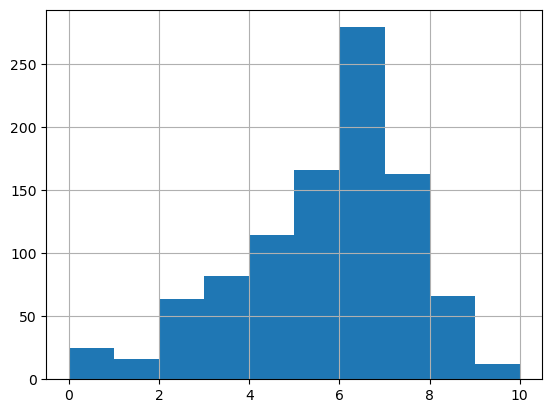

In [78]:
#greenhouse score 2008
df1['greenhouse_gas_score'].hist();

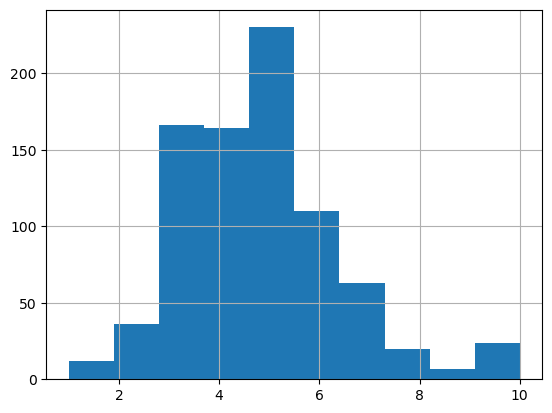

In [79]:
#greenhouse gas score 2018

df2['greenhouse_gas_score'].hist();

2008 distribution is skewed to the left. The mean is dragged down and is smaller than the median. This could be due to several outliers with smaller greenhouse gas score values.

As for 2018, the distribution looks slightly right skewed.

### 2.How has the distribution of combined mpg changed from 2008 to 2018?

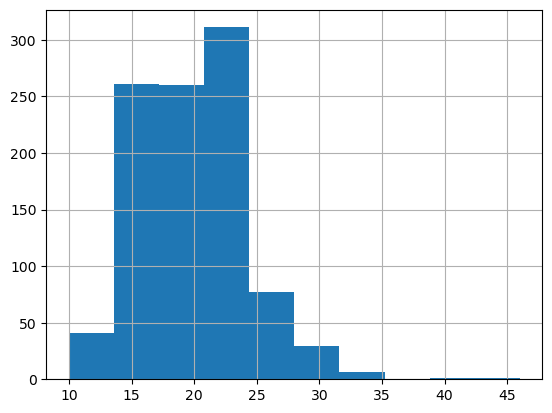

In [81]:
# Combined MPG 2008

df1['cmb_mpg'].hist();

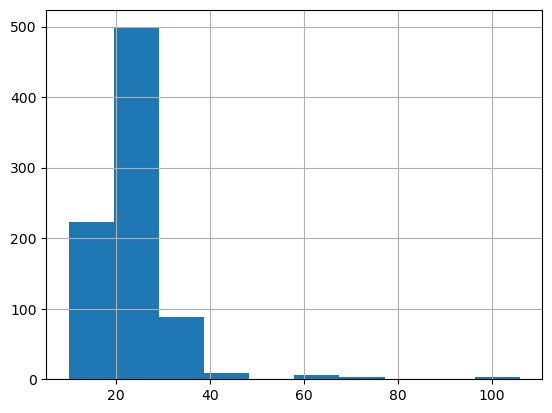

In [82]:
# Combined MPG 2018
df2['cmb_mpg'].hist();

In 2018, we can see that it is skewed to the right judging by the several huge values or outliers towards the right.

### 3.Describe the correlation between displacement and combined mpg

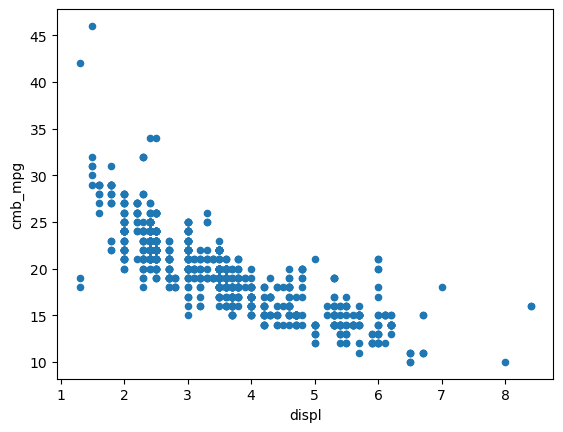

In [83]:
# Displacement and Combined MPG 2008
df1.plot(x = 'displ', y= 'cmb_mpg', kind = 'scatter');

<Axes: xlabel='displ', ylabel='cmb_mpg'>

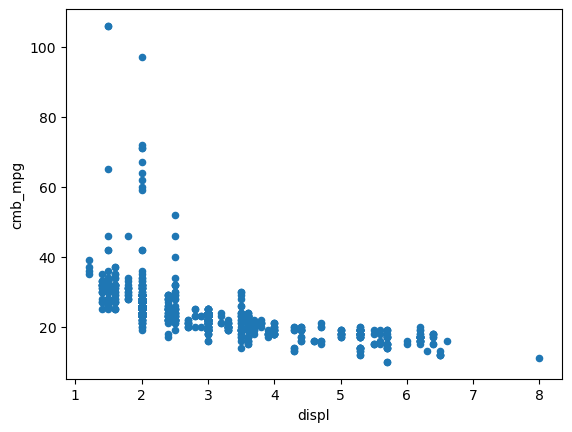

In [85]:
# Displacement and Combined MPG 2018
df2.plot(x = 'displ', y='cmb_mpg', kind = 'scatter')

There is a negative correlation. The higher the engine displacement (in liters), the lower the combined city/highway fuel economy in miles per gallon.

### 4.Describe the correlation between greenhouse gas score and combined mpg

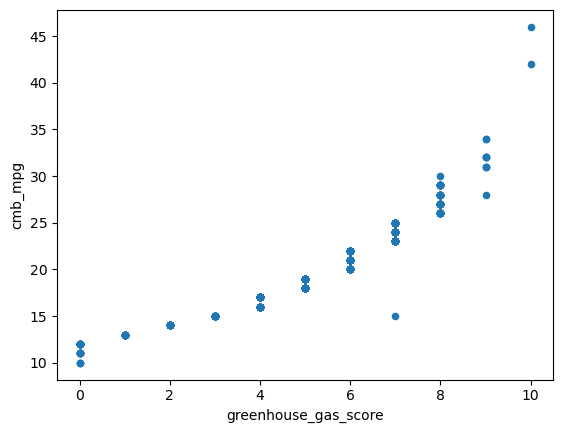

In [86]:
# Greenhouse Gas Score and Combined MPG 2008
df1.plot(x = 'greenhouse_gas_score', y= 'cmb_mpg', kind = 'scatter');

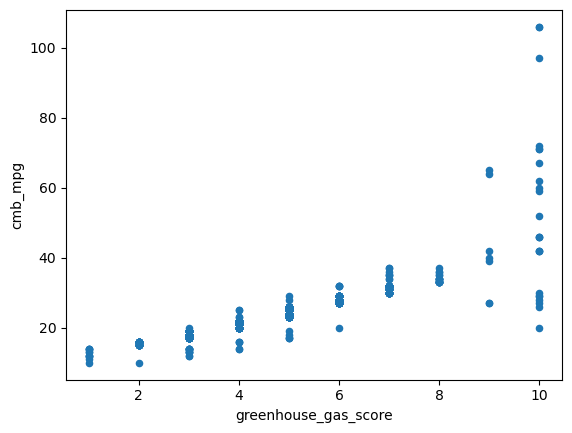

In [88]:
# Greenhouse Gas Score and Combined MPG 2018

df2.plot(x = 'greenhouse_gas_score', y = 'cmb_mpg', kind = 'scatter');

There is a positive correlation. The higher the greenhouse gas score rating, the higher the combined city/highway fuel economy in miles per gallon.

# Drawing Conclusions


#### Q1: Are more unique models using alternative sources of fuel? By how much?

first we have to check source of fuel in our dataset.

In [90]:
#source of fuel in 2008>

df1['fuel'].value_counts()

Gasoline    984
CNG           1
ethanol       1
gas           1
Name: fuel, dtype: int64

In [91]:
#source of fuel in 2018>

df2['fuel'].value_counts()

Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

 sources of fuel available in 2008 is Ethanol and CNG, and in 2018 is Ethanol and
    
Electricity(based on the Alternative Fuel Data Centre).

Next, we run query to filter subsets with alternative sources of fuel only.

In [92]:
#alternative fuel subset for 2008
alter1 = df1.query("fuel in ['CNG', 'ethanol']").model.nunique()
alter1

2

In [93]:
#alternative fuel subset for 2018
alter2 = df2.query('fuel in ["Ethanol","Electricity"]').model.nunique()
alter2

26

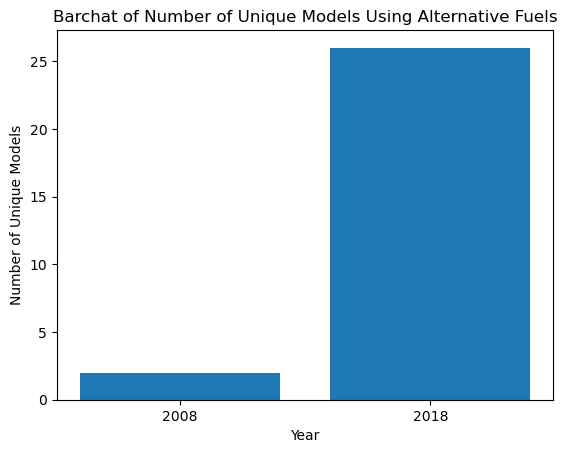

In [94]:
# Plotting bar chart>

plt.bar(['2008', '2018'], [alter1, alter2])
plt.title('Barchat of Number of Unique Models Using Alternative Fuels')
plt.xlabel('Year')
plt.ylabel('Number of Unique Models');

Since 2018, the number of unique models using alternative sources have increased by 4 to 26. From the bar chart, we can also see that the significantly higher number of unique models using alternative fuels in 2018.

In [95]:
# Find the total unique models each year

total8 = df1.model.nunique()
total18 = df2.model.nunique()
total8, total18

(377, 357)

In [96]:
# Get proportion of alternative fuel against total unique models

prop8 = alter1/total8 * 100
prop18 = alter2/total18 * 100

prop8, prop18

(0.5305039787798408, 7.282913165266107)

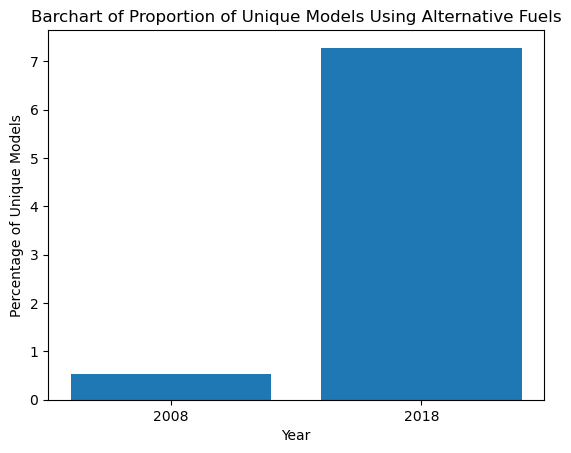

In [98]:

# Plotting bar chart
plt.bar(["2008", "2018"], [prop8, prop18])
plt.title("Barchart of Proportion of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Percentage of Unique Models");

#### Q2: How much have vehicle classes improved in fuel economy?

In [101]:
df1['veh_class'].value_counts()

small car        333
SUV              280
midsize car      138
pickup            83
station wagon     60
large car         55
van               21
minivan           17
Name: veh_class, dtype: int64

In [102]:
df2['veh_class'].value_counts()

small car          285
midsize car        138
small SUV          108
large car           88
standard SUV        86
pickup              78
station wagon       34
special purpose     10
minivan              5
Name: veh_class, dtype: int64

In [104]:
veh_class08 = df1.groupby('veh_class')['cmb_mpg'].mean()
veh_class08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [105]:
veh_class18 = df2.groupby('veh_class')['cmb_mpg'].mean()
veh_class18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [106]:
# Find the variance>>

vrnc = veh_class18-veh_class08
vrnc

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

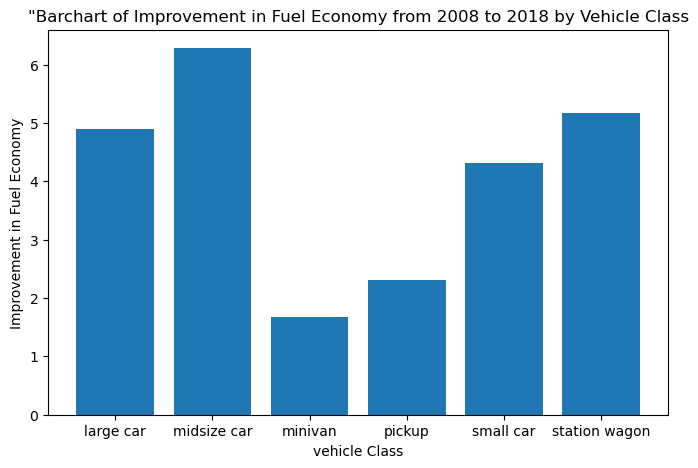

In [110]:
# Plotting bar chart
vrnc.dropna(inplace = True)   #drop variance with Nan Values
plt.subplots(figsize = [8,5])
plt.bar(vrnc.index, vrnc)
plt.title('"Barchart of Improvement in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('vehicle Class')
plt.ylabel('Improvement in Fuel Economy');

Midsize car, station wagon and large car have the highest improvements in fuel economy at 5.3%, 5.2% and 4.2% - followed by small car, pickup and mini van.

#### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

first see characteristics of SmartWay vehicles

##### What are SmartWay Certified Vehicles?
* Each model year, EPA rates every new car, truck, and Sport Utility Vehicle (SUV) for greenhouse gas and smog-forming emissions (air pollution) on scales of 1-10. To earn the SmartWay designation, a vehicle must receive a combined score from both scales that is much better than the average vehicle. SmartWay Elite certification is given to only those vehicles that attain the highest scores on both scales. Reference:https://www.epa.gov/greenvehicles/consider-smartway-vehicle


##### Greenhouse Gas Rating>
* This rating reflects vehicle tailpipe emissions that contribute to local and regional air pollution, creating problems such as smog, haze, and health issues. Vehicles that score a 10 are the cleanest. Reference: https://www.epa.gov/greenvehicles/smog-rating


##### Smog (Air Pollution) Rating >
* This rating reflects vehicle tailpipe emissions that contribute to local and regional air pollution, creating problems such as smog, haze, and health issues. Vehicles that score a 10 are the cleanest. Reference: https://www.epa.gov/greenvehicles/smog-rating


Let us analyse by filtering our data by SmartWay classification.

In [112]:
# Get unique values in SmartWay 2008
df1['smartway'].unique()

array(['no', 'yes'], dtype=object)

In [114]:
# Filter subset to SmartWay vehicles for 2008
smartway8 = df1.query('smartway == "yes" ')
smartway8.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes
5,ACURA TL,3.5,6,Man-6,2WD,Gasoline,midsize car,7.0,18.0,27.0,21.0,6,yes
7,ACURA TSX,2.4,4,Auto-S5,2WD,Gasoline,small car,6.0,20.0,28.0,23.0,7,yes
14,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,24.0,7,yes


In [115]:
# Get descriptive statistics for 2008
smartway8.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [116]:
# Repeat the same steps for 2018
# Get unique values in SmartWay 2018
df2['smartway'].unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [117]:
# Filter subset to SmartWay vehicles for 2018
smartway18 = df2.query('smartway in ["Yes","Elite"]')
smartway18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
15,AUDI A4 Ultra,2.0,4,AMS-7,2WD,Gasoline,small car,3.0,27.0,37.0,31.0,7,Yes
120,BUICK Encore,1.4,4,SemiAuto-6,2WD,Gasoline,small SUV,3.0,27.0,33.0,30.0,7,Yes
168,CHEVROLET Cruze,1.4,4,Man-6,2WD,Gasoline,small car,6.0,27.0,40.0,32.0,7,Yes
169,CHEVROLET Cruze,1.4,4,SemiAuto-6,2WD,Gasoline,small car,6.0,29.0,40.0,33.0,8,Yes
170,CHEVROLET Cruze,1.6,4,Auto-9,2WD,Diesel,small car,3.0,31.0,47.0,37.0,7,Yes


In [118]:
# Get descriptive statistics for 2018
smartway18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.787963,3.935185,5.212963,34.907407,41.472222,37.361111,7.925926
std,0.408031,0.416329,1.798498,16.431982,13.095236,14.848429,1.197378
min,1.200000,3.000000,3.000000,25.000000,27.000000,26.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.700000,4.000000,5.500000,28.500000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,31.250000,40.250000,35.000000,9.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


In [119]:
s8_count = smartway8['smartway'].count()
s8_count

380

In [120]:
s18_count = smartway18['smartway'].count()
s18_count

108

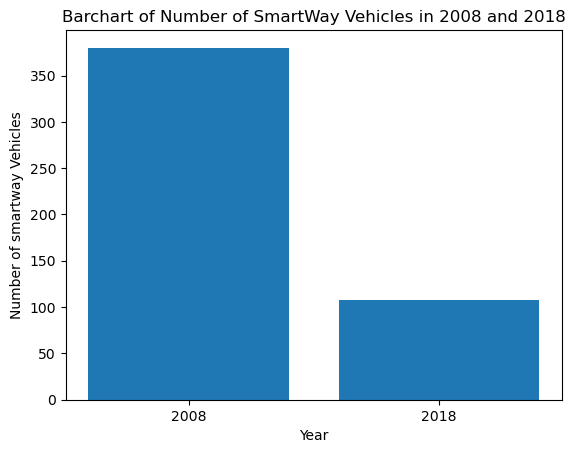

In [121]:
#lets plot>>

plt.bar(['2008', '2018'], [s8_count, s18_count])
plt.title("Barchart of Number of SmartWay Vehicles in 2008 and 2018")
plt.xlabel('Year')
plt.ylabel('Number of smartway Vehicles');

There are 380 SmartWay vehicles in 2008 (38% of sampled 987 cars) and only 108 SmartWay vehicles in 2018 (13% of sampled 832 cars) - that's at least a 65% reduction in vehicles passing the SmartWay test! Or, is it that the minimum passing threshold has increased in 2018?

for this we have to analyze the avg greenhouse gas and air pollution for both years.

In [123]:
# Find mean for greenhouse gas and air pollution in 2008
smartmean8 = smartway8[['greenhouse_gas_score','air_pollution_score']].mean()
smartmean8

greenhouse_gas_score    6.868421
air_pollution_score     7.365789
dtype: float64

In [125]:
# Find mean for greenhouse gas and air pollution in 2018
smartmean18 = smartway18[['greenhouse_gas_score','air_pollution_score']].mean()
smartmean18

greenhouse_gas_score    7.925926
air_pollution_score     5.212963
dtype: float64

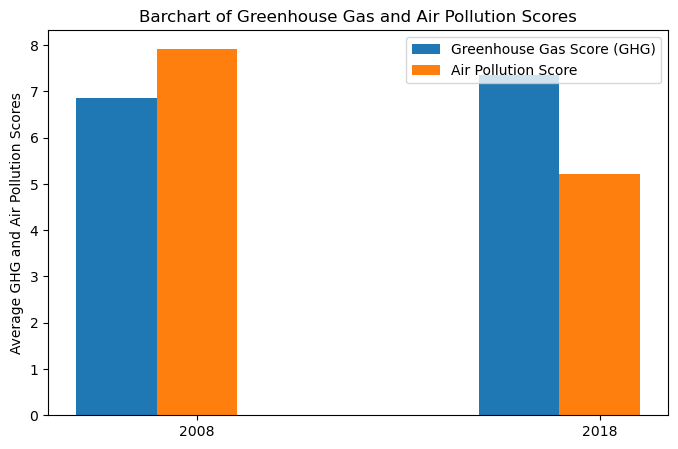

In [129]:
# Plotting barchart
x= np.arange(2)
width = 0.2

plt.subplots(figsize = [8,5])
plt.bar(x-0.2, smartmean8, width)
plt.bar(x, smartmean18, width)
plt.title("Barchart of Greenhouse Gas and Air Pollution Scores")
plt.xticks(x, ['2008', '2018'])
plt.ylabel("Average GHG and Air Pollution Scores")
plt.legend(["Greenhouse Gas Score (GHG)", "Air Pollution Score"]);

The average greenhouse gas score has increased from 6.8 to 7.9, but air pollution average score has dropped from 7.4 to 5.2. This seems strange - what does the drop in smog rating means?

here it is (https://www.epa.gov/greenvehicles/smog-rating)

* Model year 2018 and later: The smog rating chart has been recalibrated to reflect new, more stringent Tier 3 emission standards. This is good news, as Tier 3 cars and trucks are much cleaner. This recalibration makes better use of the entire smog rating scale and allows for more useful comparisons between vehicles. Please note: Even though ratings appear to be going down, vehicles are not getting dirtier. A MY 2018 and later smog rating of 3 is about the same as a MY 2017 smog rating of 6.

That's good to know!

#### Q4: What features are associated with better fuel economy?

The features associated with better fuel economy are city fuel economy city_mpg and highway fuel economy hwy_mpg or, we can instead take a look at the combined city/ highway fuel economy cmb_mpg feature.

We interpret "better fuel economy" as cars with an above average combined fuel economy. Hence, we filter data with cmb_mpg feature higher than the mean

In [131]:
cmb_mean8 = df1.query('cmb_mpg > cmb_mpg.mean()')
cmb_mean8.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes
5,ACURA TL,3.5,6,Man-6,2WD,Gasoline,midsize car,7.0,18.0,27.0,21.0,6,yes
6,ACURA TSX,2.4,4,Man-6,2WD,Gasoline,small car,6.0,19.0,28.0,22.0,6,no
7,ACURA TSX,2.4,4,Auto-S5,2WD,Gasoline,small car,6.0,20.0,28.0,23.0,7,yes


In [132]:
cmb_mean8.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.998073,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.034856,1.159565,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [133]:
cmb_mean18 = df2.query('cmb_mpg > cmb_mpg.mean()')
cmb_mean18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
2,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,small car,3.0,23.0,33.0,27.0,6,No
7,ALFA ROMEO 4C,1.8,4,AutoMan-6,2WD,Gasoline,small car,1.0,24.0,34.0,28.0,6,No
9,AUDI A3,2.0,4,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No
10,AUDI A3,2.0,4,AMS-7,2WD,Gasoline,small car,7.0,26.0,35.0,29.0,6,No
11,AUDI A3 Cabriolet,2.0,4,AMS-6,4WD,Gasoline,small car,7.0,22.0,30.0,25.0,5,No


In [135]:
cmb_mean18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1.964329,4.021341,4.856707,27.472561,35.304878,30.411585,6.329268
std,0.398593,0.465477,1.860802,11.033692,9.024857,10.081539,1.410358
min,1.200000,3.000000,1.000000,21.000000,27.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,28.000000,36.000000,31.000000,7.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


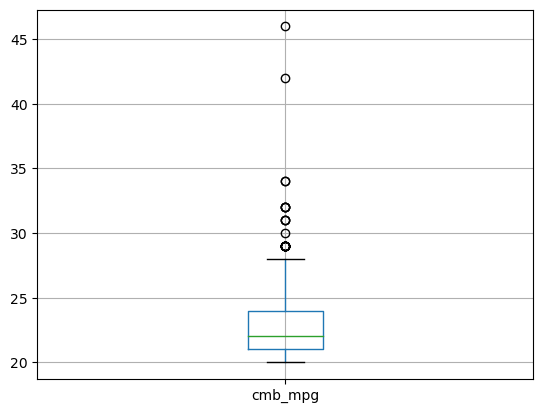

In [139]:
# boxplot for combined MPG 2008

cmb_mean8.boxplot(column = 'cmb_mpg');

2008 boxplot is showing a left skewed distribution with 75% of cars being within the averaged combined MPG score of 24. Several outliers were seen having higher data points.

<Axes: >

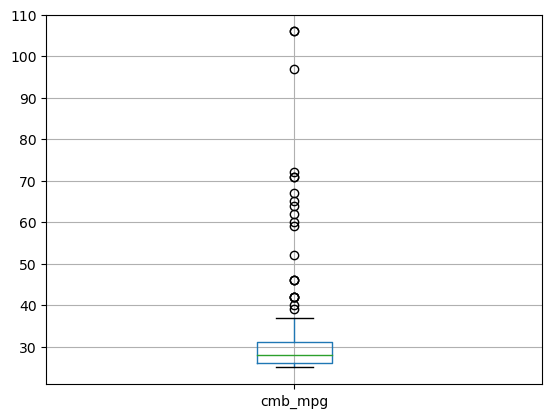

In [141]:
# Plotting boxplot for combined MPG 2018

cmb_mean18.boxplot(column = 'cmb_mpg')

2018 boxplot is strewn with outliers - with some outrageously high score at 100 and 110. A high score means the cars is capable of travelling at longer distance with the same amount of fuel. 75% of vehicles fall within the 25 to 30 score.

#### Q5: For all of the models that were produced in 2008 that are still being produced now, how much has the mpg improved and which vehicle improved the most?

To answer this  Question , we have to perform some merging first!>

#### 1. Rename 2008 columns to distinguish from 2018 columns after the merge
To do this, use pandas' rename() with a lambda function. In the lambda function, take the first 10 characters of the column label and and concatenate it with _2008. (Only take the first 10 characters to prevent really long column names.)

The lambda function should look something like this: lambda x: x[:10] + "_2008"

In your rename, don't forget to specify the parameter columns= when you add the lambda function!



#### 2. Perform inner merge

To answer the last question, we are only interested in how the same model of car has been updated and how the new model's mpg compares to the old model's mpg.

Perform an inner merge with the left on model_2008 and the right on model.




In [143]:
# rename 2008 columns
df1 = df1.rename(columns = (lambda x: x[:10] + '_2008'))

df1.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [145]:
# merge datasets>>

df_merge = pd.concat([df1, df2], axis = 1, join = 'inner')

In [146]:
df_merge.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,...,AMS-8,2WD,Gasoline,small car,3.0,23.0,33.0,27.0,6,No
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,...,SemiAuto-9,2WD,Gasoline,small car,3.0,20.0,32.0,24.0,5,No
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,...,SemiAuto-9,4WD,Gasoline,small car,3.0,21.0,30.0,24.0,5,No


NoW>>> lets start solving this question>

#### 1. Create a new dataframe, model_mpg, that contain the mean combined mpg values in 2008 and 2018 for each unique model
To do this, group by model and find the mean cmb_mpg_2008 and mean cmb_mpg for each.

In [148]:
model_mpg = df_merge.groupby('model')[['cmb_mpg_2008', 'cmb_mpg']].mean()

In [149]:
model_mpg.head()

,cmb_mpg_2008,cmb_mpg
model,,
ACURA RDX,18.0,22.5
ACURA TLX,20.0,25.0
ACURA TLX AWD A-SPEC,21.0,23.0
ACURA TLX FWD A-SPEC,22.0,23.0
ALFA ROMEO 4C,23.0,28.0


In [152]:
model_mpg.shape

(357, 2)

#### 2. Create a new column, mpg_change, with the change in mpg
Subtract the mean mpg in 2008 from that in 2018 to get the change in mpg

In [154]:
model_mpg['mpg_change'] = model_mpg['cmb_mpg'] - model_mpg['cmb_mpg_2008']

In [155]:
model_mpg.head()

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
ACURA RDX,18.0,22.5,4.5
ACURA TLX,20.0,25.0,5.0
ACURA TLX AWD A-SPEC,21.0,23.0,2.0
ACURA TLX FWD A-SPEC,22.0,23.0,1.0
ALFA ROMEO 4C,23.0,28.0,5.0


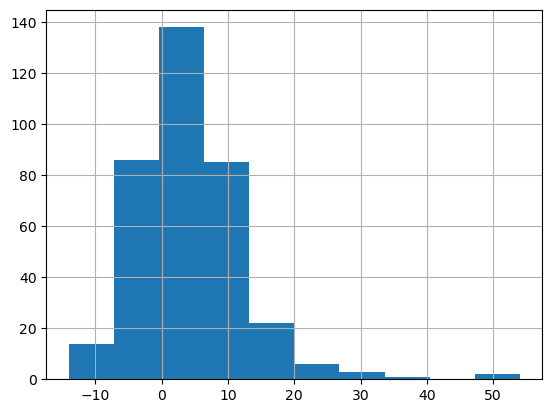

In [157]:
model_mpg['mpg_change'].hist();

#### 3. Find the vehicle that improved the most
Find the max mpg change, and then use query or indexing to see what model it is!

In [159]:
max_mpg_change = model_mpg['mpg_change'].max()
max_mpg_change

54.0

In [160]:
model_mpg[model_mpg['mpg_change'] == max_mpg_change]

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
CHEVROLET Volt,20.0,74.0,54.0


# Conclusion

lets sumerize from beginning of the analsis

#### Q1: Are more models using alternative sources of fuel? By how much?
As compared to 2008, more models are using alternative sources of fuel in 2018 such as Ethanaol, Gas and Electricity and we measured this - by at least 1200%! (2008: 2 models, 2018: 26 models).



#### Q2: Are more models using alternative sources of fuel? By how much?
Midsize cars, station wagons and large cars have the highest improvements in fuel economy at 5.3%, 5.2% and 4.2% - followed by small car, pickup and mini van.


#### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?
SmartWay vehicles are vehicles that received a combined score of greenhouse gas and smog rating (air pollution) higher than the average rating.

Based on analysis,
* At least 65% reduction in vehicles passing the SmartWay test in 2018.
* Average greenhouse gas score has increased from 6.8 to 7.9, but air pollution average score has dropped from 7.4 to 5.2
* Further investigation shows that 2018 smog rating of 3 is about the same as a 2017 smog rating of 6 which means a lower score is used, but the quality of the rating remains the same, or have became stricter.




#### Q4: What features are associated with better fuel economy?
City and highway MPG or the combined feature, combined MPG is associated with better fuel economy.

There were more vehicles associated with better fuel economy with outliers having scores at ranges of 40 to 110. For context, the average fuel economy score is 30.


#### Q5: For all the models that were produced in 2008 that are still produced in 2018, how much has the mpg (miles/gallon) improved and which vehicle improved the most?

There were 357 models that were still produced in 2018 and at least 40%, or 140 vehicles have improvements in MPG averaged at 5%. CHEVROLET Volt model made the highest improvements at 54%!

In [ ]:
Thank you! for reading my analysis.